In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [11]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


Evaluation for total null values

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

To check any duplicates

In [9]:
df.duplicated().sum()

0

To find correlation between data

Text(0.5, 1.0, 'Heatmap for the correlations')

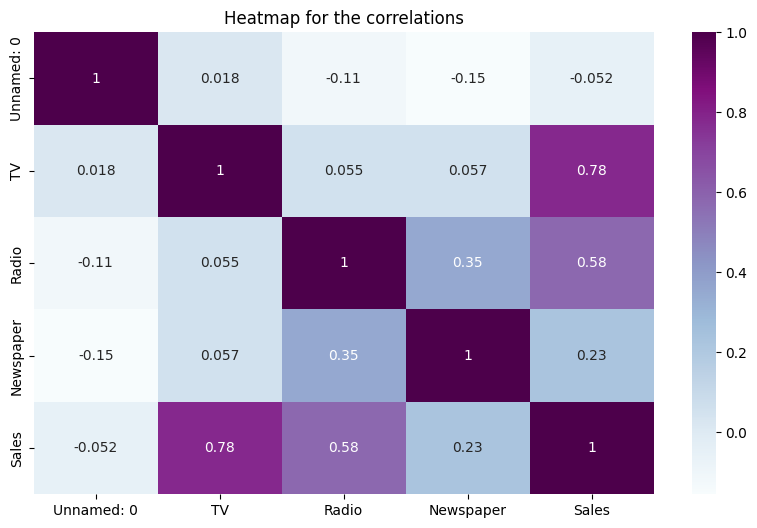

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title("Heatmap for the correlations")

Scatter plot between tv and sales

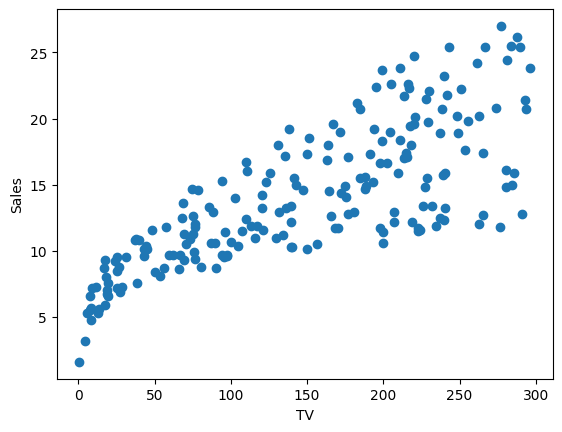

In [18]:
x=df['TV']
y=df['Sales']
plt.scatter(x,y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Scatter plot between Radio and sales

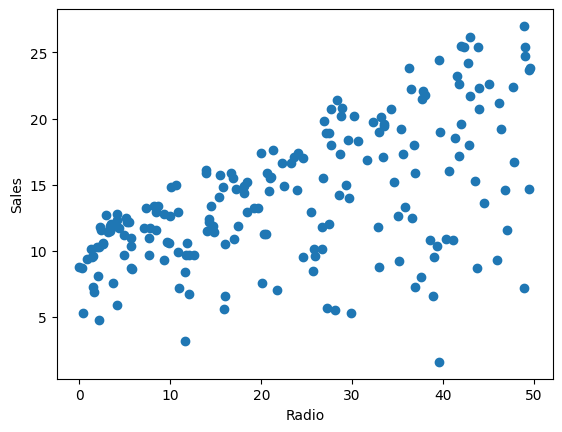

In [22]:
x=df['Radio']
y=df['Sales']
plt.scatter(x,y)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

Scatter plot between Newspaper and sales

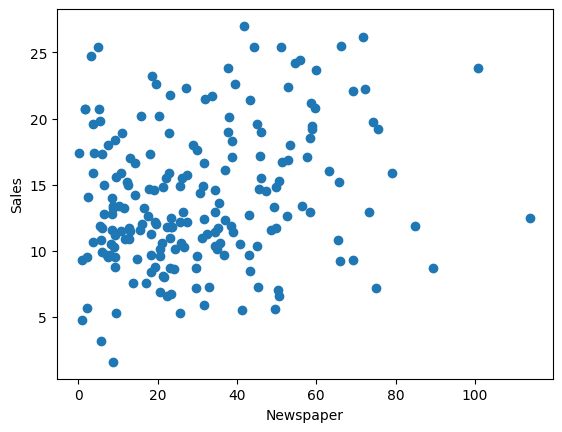

In [21]:
x=df['Newspaper']
y=df['Sales']
plt.scatter(x,y)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

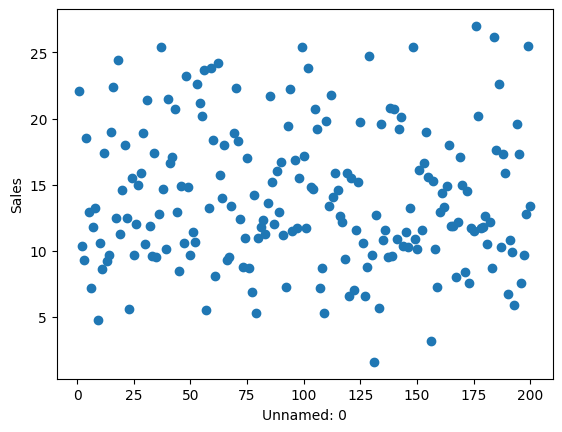

In [20]:
x=df['Unnamed: 0']
y=df['Sales']
plt.scatter(x,y)
plt.xlabel('Unnamed: 0')
plt.ylabel('Sales')
plt.show()

unamed:0 is not in good correlation between sales

So for model prepration take columns TV , Radio and Newspaper
 as the the input attribute

LinearRegression model

In [25]:
x=df.drop(columns=['Sales','Unnamed: 0'])
y=df['Sales']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_predictions=lr.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [33]:
MAE = mean_absolute_error(y_test, y_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, y_predictions))
r2 = r2_score(y_test, y_predictions)
print("Mean Absolute Error:", MAE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", r2)

Mean Absolute Error: 1.1853875261172555
Root Mean Squared Error: 1.9471783228446917
R-squared: 0.875794699586378


In [39]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = lr.score(X_test, y_test)*100
accuracy

87.5794699586378